In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv("../../data/sierraleone-bumbuna.csv")

In [6]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)  # Compute Z-scores

# Flag rows where any |Z| > 3 (considered outliers)
outlier_flags = (z_scores.abs() > 3)
df['is_outlier'] = outlier_flags.any(axis=1)  # Mark True if any column exceeds Z=3

print(f"Total outliers detected: {df['is_outlier'].sum()}")

Total outliers detected: 16292


In [7]:
for col in cols_to_check:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())
df_cleaned_seralleone = df[~df['is_outlier']].drop(columns='is_outlier')

In [9]:
benin_df = pd.read_csv('data/benin_clean.csv')
togo_df = pd.read_csv('data/togo_clean.csv')
serraleone_df = df_cleaned_seralleone

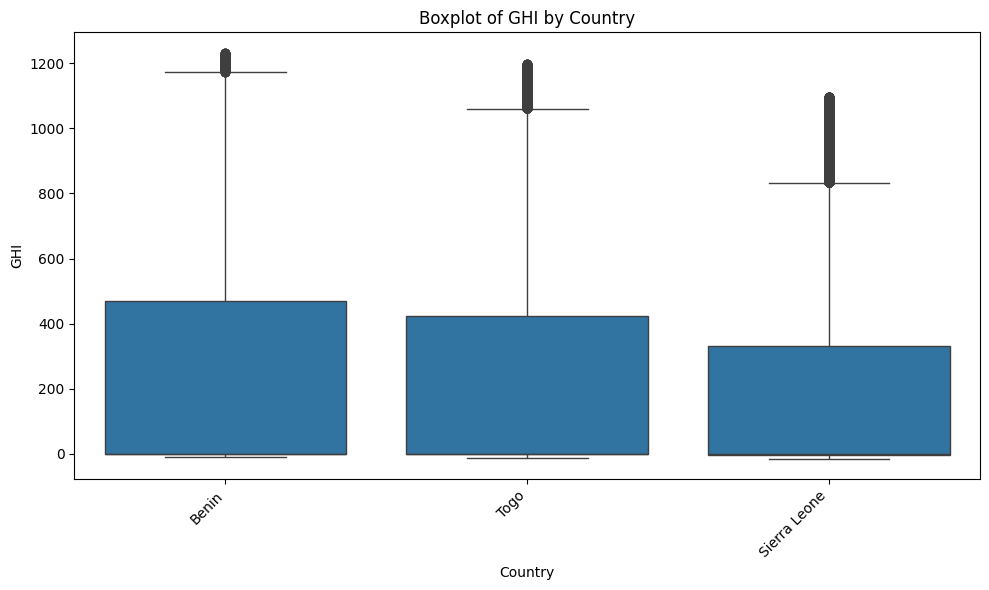

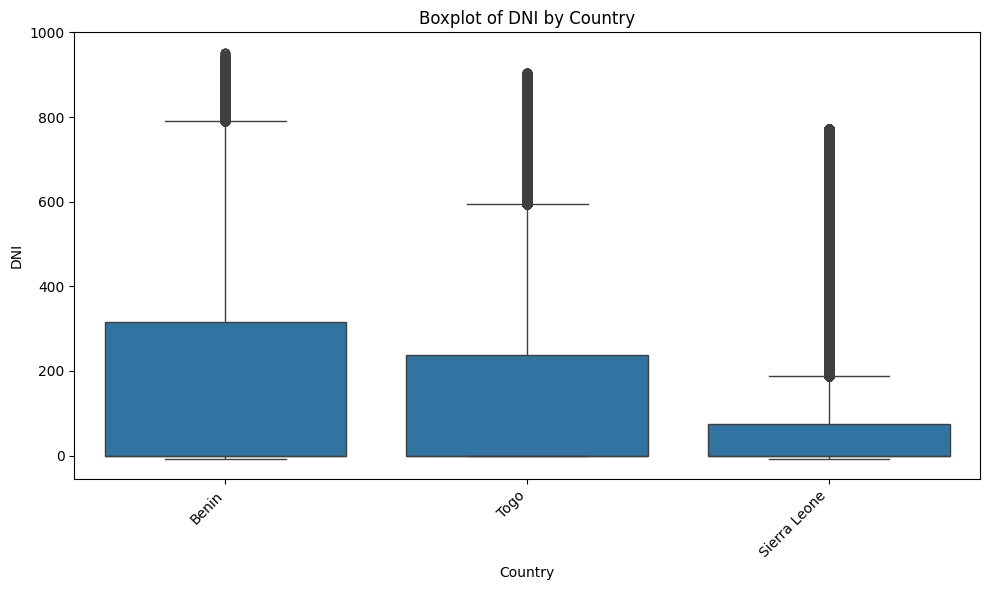

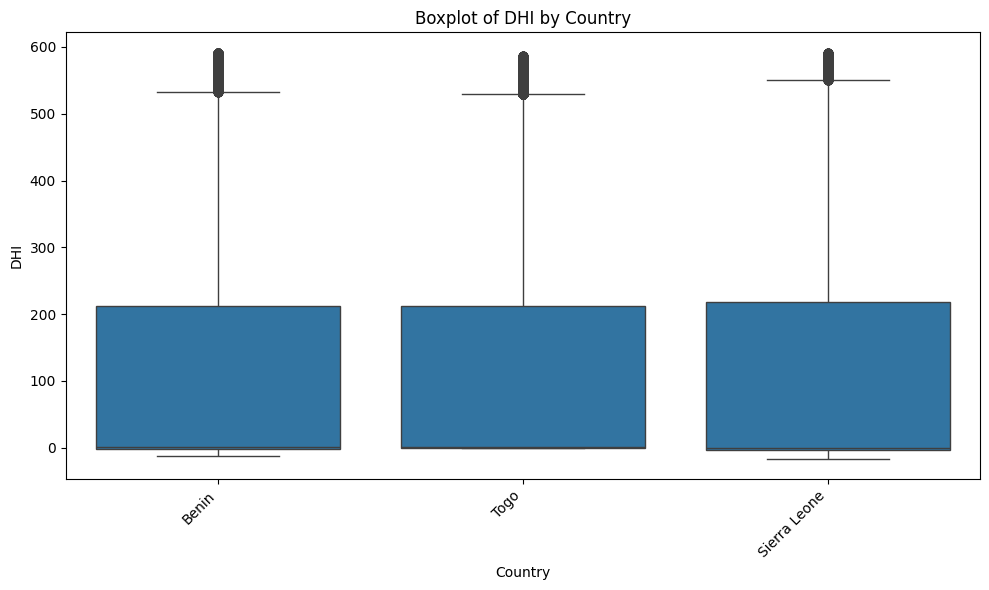

In [11]:
# Add a 'Country' column to each dataframe
benin_df['Country'] = 'Benin'
togo_df['Country'] = 'Togo'
serraleone_df['Country'] = 'Sierra Leone'

# Concatenate all data
combined_df = pd.concat([benin_df, togo_df, serraleone_df], ignore_index=True)

# Metrics to plot
metrics = ['GHI', 'DNI', 'DHI']

# Plot boxplots
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x='Country', y=metric)
    plt.title(f'Boxplot of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 📊 Comparing the Countries: 

---

#### Median GHI

- **Central Tendency (Median): Benin and Togo have similar median GHI values.**
- **sierra Leone appears to have a slightly lower median.**
---

#### 📦 Spread of GHI (Interquartile Range - IQR)

- **Benin**: Has a **taller box**, indicating a **larger spread** in the middle 50% of GHI values. This suggests **greater variability** in typical GHI.
- **Sierra Leone and Togo**: **Shorter boxes**, implying a **more concentrated range** in their central 50% of values.

---

#### 📈 Overall Range (Whiskers)

- **Upper Whiskers**: All three countries extend to similar high GHI values, **around 1200 or slightly above** — suggesting potential for high solar irradiance in all.
- **Lower Whiskers**: Close to **zero**, indicating very **low GHI values** are also common across all three locations.

---

#### ⚠️ Outliers

- All countries show **several outliers** above the upper whiskers, representing **unusually high GHI events**.
- **No significant low-end outliers** are observed in any of the countries.

---

### 🧾 In Summary

- **Benin and Togo** have **slightly higher median GHI** compared to **Sierra Leone**.
- **Benin** shows **greater variability** in typical GHI values.
- **Sierra Leone and Togo** have **more consistent** central GHI ranges.
- All countries share a **similar overall GHI range**, including **occasional extreme highs**.

In [15]:
summary_data = {}

# Group by country and compute stats for selected columns
for country, df in combined_df.groupby('Country'):
    summary_data[country] = df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).T

# Combine summaries into one table
summary_table = pd.concat(summary_data, axis=1)
summary_table.columns.name = 'Country'  # Optional: name the columns index

print("\nSummary Table of GHI, DNI, DHI across Countries:")
print(summary_table)


Summary Table of GHI, DNI, DHI across Countries:
          Benin                    Sierra Leone                     \
           mean median         std         mean median         std   
GHI  236.234508    0.7  328.288787   185.000024   -0.4  279.019460   
DNI  166.896673   -0.1  262.081997   104.128943   -0.1  200.954182   
DHI  111.656477    0.5  153.099749   108.104278   -0.6  153.691835   

           Togo                     
           mean median         std  
GHI  223.859675    0.5  317.306277  
DNI  147.975931    0.0  247.683690  
DHI  112.781249    1.5  151.571744  


In [16]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values by country
ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI']
ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI']
ghi_sierra = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI']

# Run One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

# Run Kruskal–Wallis test
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_togo, ghi_sierra)

# Print results
print("Statistical Testing on GHI values:")
print(f"One-way ANOVA p-value: {anova_p:.4f}")
print(f"Kruskal–Wallis p-value: {kruskal_p:.4f}")

Statistical Testing on GHI values:
One-way ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


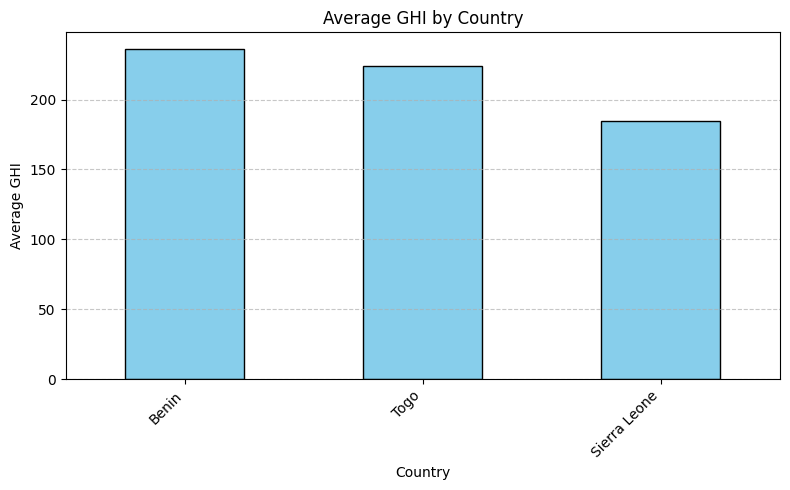

In [17]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color='skyblue', edgecolor='black')

# Formatting
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()